<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. Imports ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)





In [2]:
# --- 2. Load & Preprocess Data ---
digits = load_digits()
X = digits.images
y = digits.target

# Flatten images
n_samples = len(X)
X = X.reshape((n_samples, -1))
X = X / 16.0  # Normalize (digits pixel values are 0-16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# --- 3. Random Forest with GridSearchCV ---
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [4]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# --- 4. Evaluation ---
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9611
Precision: 0.9620
Recall: 0.9611
F1-score: 0.9609


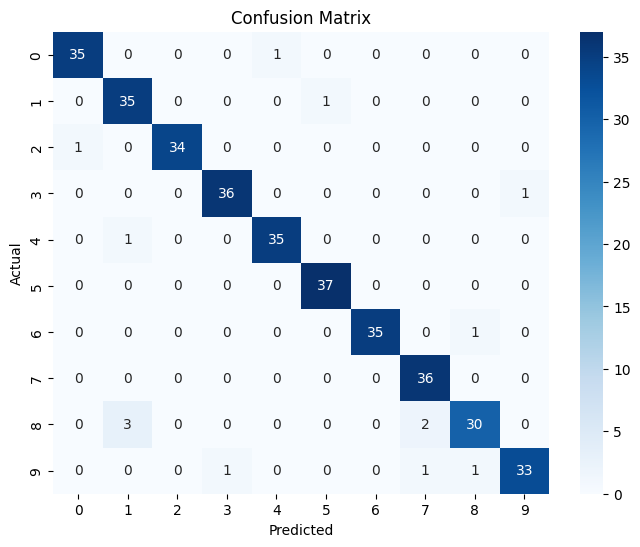

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

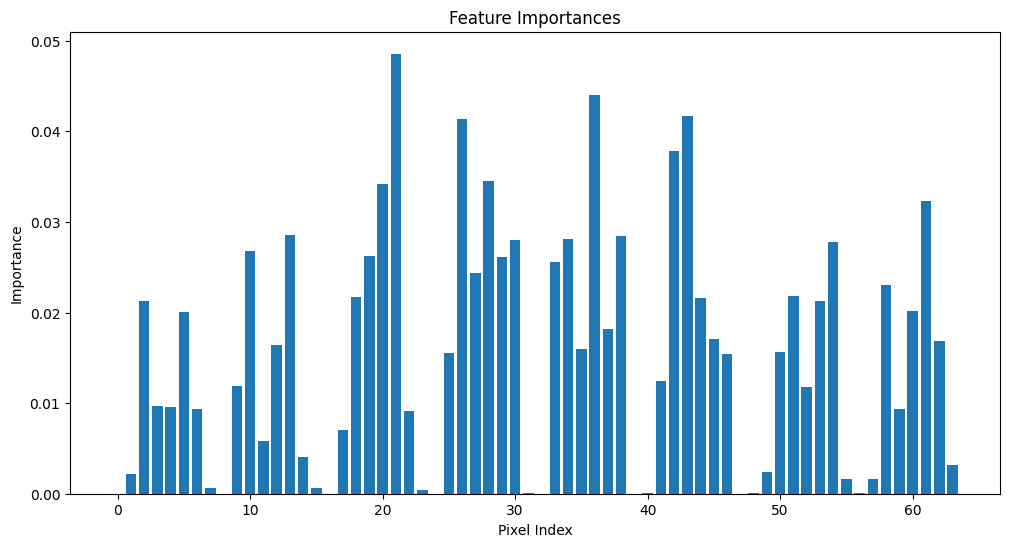

In [6]:
# --- 5. Feature Importance ---
importances = best_rf.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances")
plt.xlabel("Pixel Index")
plt.ylabel("Importance")
plt.show()

In [7]:
# --- 6. Predict New Image Example ---
def predict_new_image(image_array):
    # image_array: 8x8 numpy array
    flattened = image_array.reshape(1, -1) / 16.0
    pred = best_rf.predict(flattened)
    return pred[0]

# Example usage:
sample_image = X_test[0].reshape(8,8) * 16  # Re-scale for demonstration
predicted_class = predict_new_image(sample_image)
print("Predicted Class:", predicted_class)


Predicted Class: 5


In [8]:
# --- 7. Bonus: SVM Comparison ---
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

